In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression

In [2]:
dataset=pd.read_csv('house.csv')
#print shape of datset with rows and columns
dataset.shape

(6830, 16)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6830 non-null   int64  
 1   Type           6830 non-null   int64  
 2   Price          6830 non-null   int64  
 3   Method         6830 non-null   int64  
 4   SellerG        6830 non-null   int64  
 5   Distance       6830 non-null   float64
 6   Postcode       6830 non-null   int64  
 7   Bathroom       6830 non-null   int64  
 8   Car            6830 non-null   int64  
 9   Landsize       6830 non-null   int64  
 10  BuildingArea   6830 non-null   float64
 11  YearBuilt      6830 non-null   int64  
 12  CouncilArea    6830 non-null   int64  
 13  Longtitude     6830 non-null   float64
 14  Regionname     6830 non-null   int64  
 15  Propertycount  6830 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 853.9 KB


In [4]:
dataset.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [5]:
#calculate percentage of null values of each column 
null_var=dataset.isnull().sum()/dataset.shape[0]*100  
# isnull.sum()/no. of records*100  here shape[0] : no. of rows
null_var

Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Distance         0.0
Postcode         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
BuildingArea     0.0
YearBuilt        0.0
CouncilArea      0.0
Longtitude       0.0
Regionname       0.0
Propertycount    0.0
dtype: float64

In [6]:
dataset.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,2,0,1035000,1,23,2.5,3067,1,0,156,79.0,1900,31,144.9934,2,4019
1,3,0,1465000,3,23,2.5,3067,2,0,134,150.0,1900,31,144.9944,2,4019
2,4,0,1600000,4,155,2.5,3067,1,2,120,142.0,2014,31,144.9941,2,4019
3,3,0,1876000,1,155,2.5,3067,2,0,245,210.0,1910,31,144.9993,2,4019
4,2,0,1636000,1,155,2.5,3067,1,2,256,107.0,1890,31,144.9954,2,4019


In [7]:
dataset['Current Year']=2021
dataset['no_year']=dataset['Current Year']- dataset['YearBuilt']

In [8]:
dataset.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount,Current Year,no_year
0,2,0,1035000,1,23,2.5,3067,1,0,156,79.0,1900,31,144.9934,2,4019,2021,121
1,3,0,1465000,3,23,2.5,3067,2,0,134,150.0,1900,31,144.9944,2,4019,2021,121
2,4,0,1600000,4,155,2.5,3067,1,2,120,142.0,2014,31,144.9941,2,4019,2021,7
3,3,0,1876000,1,155,2.5,3067,2,0,245,210.0,1910,31,144.9993,2,4019,2021,111
4,2,0,1636000,1,155,2.5,3067,1,2,256,107.0,1890,31,144.9954,2,4019,2021,131


In [9]:
dataset.drop(['YearBuilt'],axis=1,inplace=True)

In [12]:
dataset.drop(['Current Year'],axis=1,inplace=True)

In [13]:
dataset.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Longtitude,Regionname,Propertycount,no_year
0,2,0,1035000,1,23,2.5,3067,1,0,156,79.0,31,144.9934,2,4019,121
1,3,0,1465000,3,23,2.5,3067,2,0,134,150.0,31,144.9944,2,4019,121
2,4,0,1600000,4,155,2.5,3067,1,2,120,142.0,31,144.9941,2,4019,7
3,3,0,1876000,1,155,2.5,3067,2,0,245,210.0,31,144.9993,2,4019,111
4,2,0,1636000,1,155,2.5,3067,1,2,256,107.0,31,144.9954,2,4019,131


# Feature Engineering

In [14]:
# Identify historic homes
dataset['Historic'] = np.where(dataset['no_year']>=50,'Historic','Contemporary')

# Convert to Category
dataset['Historic'] = dataset['Historic'].astype('category')

In [15]:
dataset.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Longtitude,Regionname,Propertycount,no_year,Historic
0,2,0,1035000,1,23,2.5,3067,1,0,156,79.0,31,144.9934,2,4019,121,Historic
1,3,0,1465000,3,23,2.5,3067,2,0,134,150.0,31,144.9944,2,4019,121,Historic
2,4,0,1600000,4,155,2.5,3067,1,2,120,142.0,31,144.9941,2,4019,7,Contemporary
3,3,0,1876000,1,155,2.5,3067,2,0,245,210.0,31,144.9993,2,4019,111,Historic
4,2,0,1636000,1,155,2.5,3067,1,2,256,107.0,31,144.9954,2,4019,131,Historic


# OUTLIERS

In [16]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,6830.0,2.978184e+00,0.970479,1.00000,2.000000,3.000,4.000000e+00,8.000000e+00
Type,6830.0,5.414348e-01,0.834160,0.00000,0.000000,0.000,1.000000e+00,2.000000e+00
Price,6830.0,1.077604e+06,673320.249263,131000.00000,630000.000000,890000.000,1.334000e+06,9.000000e+06
Method,6830.0,1.438360e+00,1.142603,0.00000,1.000000,1.000,1.000000e+00,4.000000e+00
SellerG,6830.0,1.316322e+02,77.124693,0.00000,73.000000,135.000,1.940000e+02,2.670000e+02
Distance,6830.0,1.014896e+01,5.991423,0.00000,6.100000,9.200,1.300000e+01,4.740000e+01
Postcode,6830.0,3.104262e+03,91.208614,3000.00000,3044.000000,3083.000,3.147000e+03,3.977000e+03
Bathroom,6830.0,1.594143e+00,0.714366,1.00000,1.000000,1.000,2.000000e+00,8.000000e+00
Car,6830.0,1.606881e+00,0.944613,0.00000,1.000000,2.000,2.000000e+00,1.000000e+01
Landsize,6830.0,4.874955e+02,910.805627,0.00000,167.000000,404.000,6.410000e+02,3.700000e+04


In [17]:
dataset[dataset['no_year']>800]

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Longtitude,Regionname,Propertycount,no_year,Historic
5114,3,0,1200000,4,140,14.2,3149,1,4,807,117.0,20,145.12121,0,13366,825,Historic


In [18]:
dataset[dataset['BuildingArea']==0]

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Longtitude,Regionname,Propertycount,no_year,Historic
2394,2,1,841000,1,106,2.3,3051,1,1,215,0.0,18,144.94370,2,6821,21,Contemporary
6201,5,0,1950000,1,192,9.7,3104,3,2,743,0.0,-1,145.09311,5,7809,72,Historic
6211,3,0,814000,1,16,12.1,3083,1,2,542,0.0,-1,145.05691,2,10175,51,Historic
6273,4,0,570000,1,194,20.6,3064,2,2,504,0.0,-1,144.93448,2,5833,21,Contemporary
6282,3,1,900000,4,106,7.0,3071,2,2,120,0.0,-1,145.02096,2,8870,21,Contemporary
6575,3,0,1390000,1,135,4.6,3181,2,1,125,0.0,-1,145.00296,5,7717,19,Contemporary
6648,3,0,1205000,2,71,12.3,3166,2,4,622,0.0,-1,145.10851,5,768,61,Historic
6707,5,0,2800000,1,135,9.7,3104,2,2,1173,0.0,-1,145.09094,5,7809,61,Historic
6720,3,0,1650000,3,32,10.3,3187,2,2,623,0.0,-1,145.02673,5,6938,101,Historic
6724,4,0,815000,1,196,12.1,3083,2,1,525,0.0,-1,145.05556,2,10175,56,Historic


In [19]:
dataset[dataset['Landsize']==0]

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Longtitude,Regionname,Propertycount,no_year,Historic
7,2,2,750000,1,23,2.5,3067,2,1,0,94.00,31,144.99650,2,4019,12,Contemporary
13,2,2,500000,1,49,2.5,3067,1,1,0,60.00,31,144.99720,2,4019,51,Historic
19,1,2,470000,1,155,2.5,3067,1,1,0,50.00,31,144.99610,2,4019,8,Contemporary
25,3,0,730000,4,155,13.5,3042,2,1,0,145.00,21,144.87550,6,3464,56,Historic
26,3,0,770000,3,155,13.5,3042,2,1,0,145.00,21,144.87550,6,3464,56,Historic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170,2,2,570000,4,196,2.7,3141,1,1,0,64.00,26,145.00206,5,14887,56,Historic
6171,2,2,600000,4,260,5.0,3182,1,1,0,82.00,25,144.97900,5,13240,91,Historic
6184,2,2,300000,3,105,12.9,3043,1,1,0,66.32,11,144.88019,6,3296,41,Contemporary
6193,1,2,385000,3,251,6.8,3016,1,1,0,35.64,10,144.89936,6,6380,54,Historic


In [20]:
# Remove outlier
dataset = dataset[dataset['BuildingArea']!=0]

# Confirm removal
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,6813.0,2.976809e+00,0.970373,1.00000,2.00000,3.00000,4.000000e+00,8.000000e+00
Type,6813.0,5.423455e-01,0.834783,0.00000,0.00000,0.00000,1.000000e+00,2.000000e+00
Price,6813.0,1.076677e+06,672461.491212,131000.00000,630000.00000,890000.00000,1.330000e+06,9.000000e+06
Method,6813.0,1.438573e+00,1.142872,0.00000,1.00000,1.00000,1.000000e+00,4.000000e+00
SellerG,6813.0,1.316160e+02,77.159530,0.00000,73.00000,135.00000,1.940000e+02,2.670000e+02
Distance,6813.0,1.014531e+01,5.989512,0.00000,6.10000,9.20000,1.300000e+01,4.740000e+01
Postcode,6813.0,3.104227e+03,91.285371,3000.00000,3044.00000,3083.00000,3.147000e+03,3.977000e+03
Bathroom,6813.0,1.593571e+00,0.714500,1.00000,1.00000,1.00000,2.000000e+00,8.000000e+00
Car,6813.0,1.606341e+00,0.945071,0.00000,1.00000,2.00000,2.000000e+00,1.000000e+01
Landsize,6813.0,4.874195e+02,911.833280,0.00000,166.00000,404.00000,6.410000e+02,3.700000e+04


# EXPLORATORY ANALYSIS

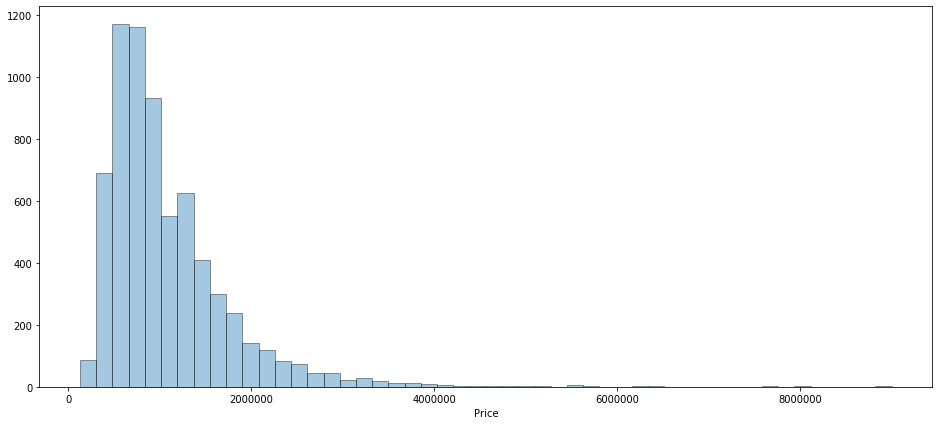

In [21]:
plt.figure(figsize=(16,7))
sns.distplot(dataset['Price'], kde = False,hist_kws=dict(edgecolor="k"))

# BIVARIATE

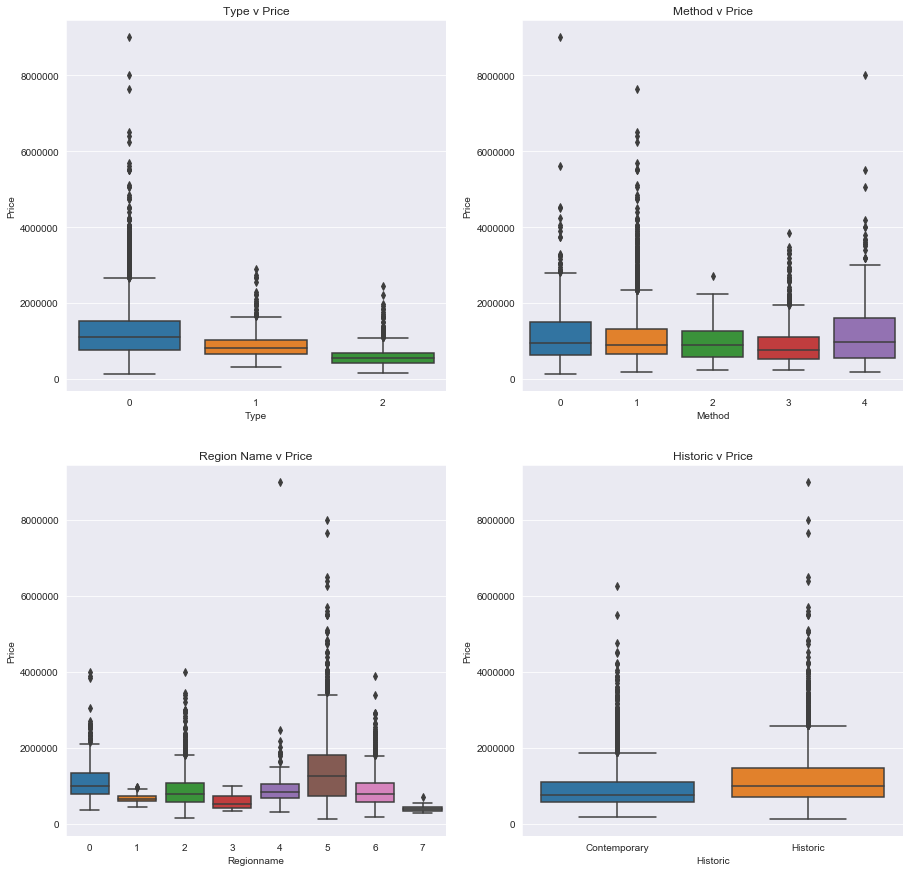

In [22]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = dataset, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = dataset, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = dataset, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')

# Plot [1,1]
sns.boxplot(x = 'Historic', y = 'Price', data = dataset, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')

plt.show()

# Numeric Features

In [23]:
# Identify numeric features
dataset.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'CouncilArea',
       'Longtitude', 'Regionname', 'Propertycount', 'no_year'],
      dtype='object')

ValueError: x and y must be the same size

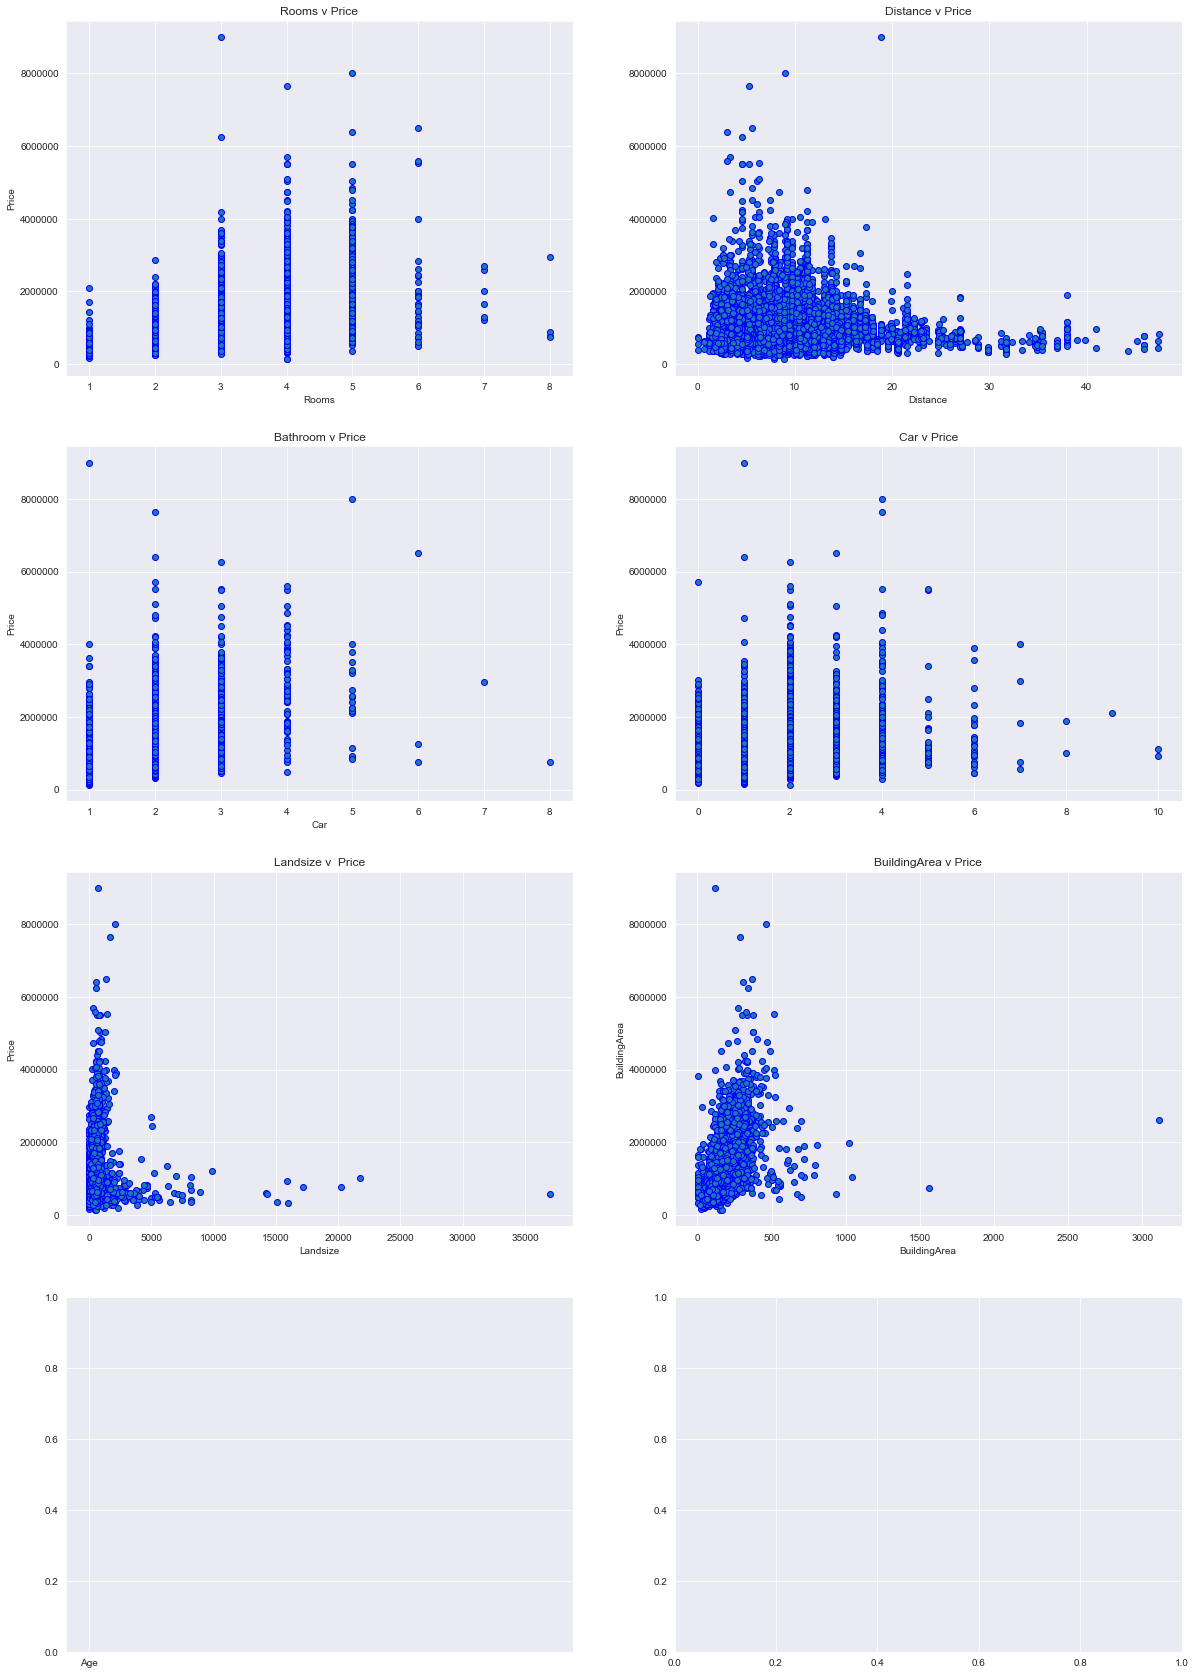

In [24]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = dataset, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = dataset, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')
plt.show()

# CORRELATION

Text(0.5, 1, 'Variable Correlation')

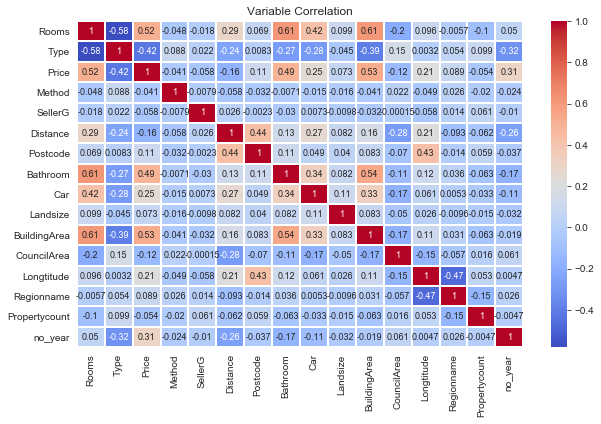

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# LINEAR REGRESSION

In [26]:
# Identify numeric features
dataset.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'CouncilArea',
       'Longtitude', 'Regionname', 'Propertycount', 'no_year'],
      dtype='object')

In [27]:
# Split
# Create features variable 
X =dataset[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','no_year']]

# Create target variable
y = dataset['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [28]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

# Regression Evaluation Metrics

In [30]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 298780.40976717573
MSE: 230165506440.2967
RMSE: 479755.6736926586


In [31]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.4788527429224123


# Analyze the Residuals

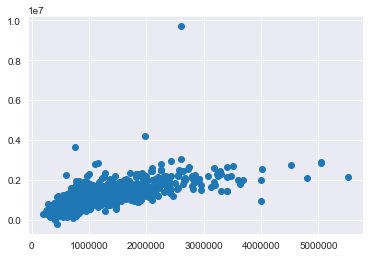

In [32]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

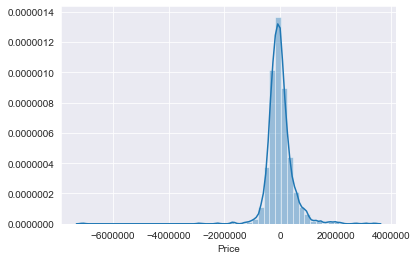

In [33]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

# TRY WITH LABEL ENCODING

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
for col in dataset :
    le=LabelEncoder()
    dataset[col]=le.fit_transform(dataset[col])

In [36]:
dataset.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Longtitude,Regionname,Propertycount,no_year,Historic
0,1,0,869,1,18,12,52,0,0,111,84,30,2078,2,144,112,1
1,2,0,1163,3,18,12,52,1,0,89,223,30,2093,2,144,112,1
2,3,0,1224,4,120,12,52,0,2,75,211,30,2090,2,144,4,0
3,2,0,1345,1,120,12,52,1,0,199,312,30,2177,2,144,103,1
4,1,0,1244,1,120,12,52,0,2,210,142,30,2108,2,144,118,1


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6813 entries, 0 to 6829
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Rooms          6813 non-null   int64
 1   Type           6813 non-null   int64
 2   Price          6813 non-null   int64
 3   Method         6813 non-null   int64
 4   SellerG        6813 non-null   int64
 5   Distance       6813 non-null   int64
 6   Postcode       6813 non-null   int64
 7   Bathroom       6813 non-null   int64
 8   Car            6813 non-null   int64
 9   Landsize       6813 non-null   int64
 10  BuildingArea   6813 non-null   int64
 11  CouncilArea    6813 non-null   int64
 12  Longtitude     6813 non-null   int64
 13  Regionname     6813 non-null   int64
 14  Propertycount  6813 non-null   int64
 15  no_year        6813 non-null   int64
 16  Historic       6813 non-null   int32
dtypes: int32(1), int64(16)
memory usage: 1.2 MB


In [38]:
x=dataset[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','no_year']] #excluding price here x=independent variable
y = dataset['Price']  #dependent variable means target variable

In [39]:
#Split data into traning(70%) and testing(30%)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [40]:
lin=LinearRegression()

In [41]:
lin.fit(x_train,y_train)

LinearRegression()

In [42]:
#Check score of Train
lin.score(x_train,y_train)

0.6507746820803799

In [43]:
# Predict
# Predicting test set results
y_pred = lin.predict(x_test)

In [44]:
#Check score of test
lin.score(x_test,y_test)

0.6601267084558052

In [45]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 198.21683751236614
MSE: 59803.438858237656
RMSE: 244.5474163802138


In [46]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.6601391486479831


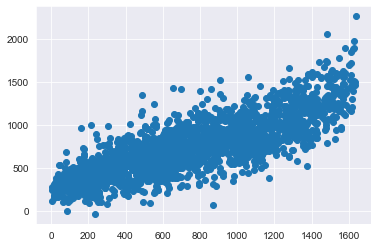

In [47]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

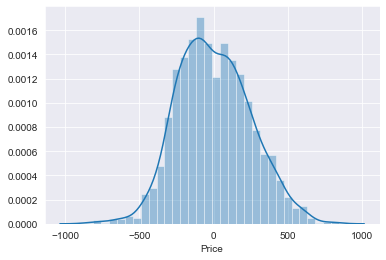

In [48]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

# Ridge and Lasso Regularization to avoid overfitting

In [49]:
from sklearn.linear_model import Lasso  #lambda*sum(abs(coef))  ==>error term add
from sklearn.linear_model import Ridge  #lambda*sum(square(coef))  ==>error term add


In [50]:
lin.coef_

array([ 7.15580262e+01, -2.93495678e+00,  8.22231027e+01,  1.68200688e+01,
        1.00903355e-01,  1.75298823e+00,  5.01468135e-02,  3.86667469e+00])

In [51]:
#Apply Regularization with Ridge
#To create the object of Ridge class and pass the parameter means value of lambda /hyperparameter
l2=Ridge(10) #here 10 ->value of lambda select 0.1  to 50
l2.fit(x_train,y_train)

Ridge(alpha=10)

In [52]:
#Again check coefficient
l2.coef_

array([ 7.12826892e+01, -2.93475297e+00,  8.16766364e+01,  1.68238643e+01,
        1.00977330e-01,  1.75713650e+00,  5.00679866e-02,  3.86534351e+00])

In [53]:
#Apply Regularization with Lasso
#To create the object of Lasso class and pass the parameter means value of lambda /hyperparameter
l1=Lasso(1000) #here 1000 ->value of lambda
l1.fit(x_train,y_train)

Lasso(alpha=1000)

In [54]:
#Again check coefficient
l1.coef_

array([ 0.        , -2.19289508,  0.        ,  0.        ,  0.11615752,
        2.48724563,  0.        ,  3.06075822])

In [55]:
for i in range (50): #start=0 and stop=49 and step : by default +1
    #create object of ridge class
    l2=Ridge(i)#l2=Ridge(0)     #RSS+Lambda*sum(coef)^2 on training time
    l2.fit(x_train,y_train)# train model with ridge regularisation
    print(l2.score(x_test,y_test))  

0.6601267084558048
0.6601252862875524
0.6601238491567518
0.6601223971186679
0.6601209302283472
0.6601194485406185
0.6601179521100947
0.6601164409911731
0.6601149152380368
0.6601133749046559
0.6601118200447883
0.6601102507119805
0.6601086669595688
0.6601070688406809
0.6601054564082357
0.6601038297149455
0.6601021888133162
0.6601005337556484
0.6600988645940387
0.6600971813803804
0.6600954841663647
0.660093773003481
0.6600920479430193
0.6600903090360695
0.6600885563335228
0.6600867898860737
0.6600850097442196
0.6600832159582624
0.6600814085783093
0.6600795876542735
0.6600777532358757
0.6600759053726442
0.6600740441139163
0.6600721695088394
0.6600702816063713
0.6600683804552815
0.660066466104152
0.6600645386013778
0.6600625979951686
0.6600606443335493
0.6600586776643598
0.6600566980352577
0.6600547054937178
0.6600527000870338
0.6600506818623183
0.6600486508665042
0.6600466071463453
0.6600445507484176
0.6600424817191195
0.6600404001046727


In [56]:
for i in range(200,500,50): #here start=200 stop=499 and increment by 50
    #creare object of Lasso   RSS+Lambda*sum of (abs(coef))
    l1=Lasso(i)
    l1.fit(x_train,y_train)
    print(l1.score(x_test,y_test))

0.6248988364169767
0.6245722598558288
0.6242094076395364
0.623810494153644
0.6233755193981521
0.6229044833730599


In [57]:
#Ridge with lambda=2 score=0.66
#Lasso with Lambda=200 score=0.62

# CROSS VALIDATION

In [58]:
#Cross validation : To compare 2 models
from sklearn.model_selection import cross_val_score

In [59]:
l2=Ridge(2)#create object of ridge
l1=Lasso(200)#create object of lasso

In [60]:
#cross validation with ridge regularisation
l1_cross=cross_val_score(l1,x,y,cv=4) #cv==>folding means how many fold

In [61]:
#check
l1_cross

array([0.61584438, 0.63977975, 0.61338155, 0.55807774])

In [62]:
#Find Average
np.mean(l1_cross)

0.6067708536596248

In [63]:
#for lasso
l2_cross=cross_val_score(l2,x,y,cv=4) #cv==>folding means how many fold

In [64]:
#check
l2_cross

array([0.64443997, 0.67115085, 0.64614034, 0.59272881])

In [65]:
#Find Average
np.mean(l2_cross)

0.6386149951506294

# WITH SCALING

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6813 entries, 0 to 6829
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Rooms          6813 non-null   int64
 1   Type           6813 non-null   int64
 2   Price          6813 non-null   int64
 3   Method         6813 non-null   int64
 4   SellerG        6813 non-null   int64
 5   Distance       6813 non-null   int64
 6   Postcode       6813 non-null   int64
 7   Bathroom       6813 non-null   int64
 8   Car            6813 non-null   int64
 9   Landsize       6813 non-null   int64
 10  BuildingArea   6813 non-null   int64
 11  CouncilArea    6813 non-null   int64
 12  Longtitude     6813 non-null   int64
 13  Regionname     6813 non-null   int64
 14  Propertycount  6813 non-null   int64
 15  no_year        6813 non-null   int64
 16  Historic       6813 non-null   int32
dtypes: int32(1), int64(16)
memory usage: 1.2 MB


In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
for col in dataset:
    ss=StandardScaler()
    dataset[col]=ss.fit_transform(dataset[[col]])

In [69]:
dataset

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Longtitude,Regionname,Propertycount,no_year,Historic
0,-1.006707,-0.649732,0.280651,-0.383775,-1.380493,-1.527678,-0.450953,-0.830811,-1.699828,-0.926925,-1.018701,1.594282,-0.052092,-0.891354,-0.741252,1.738222,0.851614
1,0.023901,-0.649732,0.982915,1.366330,-1.380493,-1.527678,-0.450953,0.568871,-1.699828,-1.003613,0.267221,1.594282,-0.038779,-0.891354,-0.741252,1.738222,0.851614
2,1.054508,-0.649732,1.128623,2.241383,0.278043,-1.527678,-0.450953,-0.830811,0.416570,-1.052414,0.156207,1.594282,-0.041441,-0.891354,-0.741252,-1.400976,-1.174241
3,0.023901,-0.649732,1.417650,-0.383775,0.278043,-1.527678,-0.450953,0.568871,-1.699828,-0.620176,1.090582,1.594282,0.035776,-0.891354,-0.741252,1.476622,0.851614
4,-1.006707,-0.649732,1.176396,-0.383775,0.278043,-1.527678,-0.450953,-0.830811,0.416570,-0.581832,-0.482129,1.594282,-0.025465,-0.891354,-0.741252,1.912622,0.851614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6825,-1.006707,-0.649732,-0.760801,-1.258827,0.229263,1.008702,-0.119440,-0.830811,-0.641629,-0.738693,-1.018701,-1.443571,1.066237,-0.891354,-1.766723,-1.168442,-1.174241
6826,1.054508,-0.649732,-0.803797,-0.383775,1.692678,1.057952,-1.113981,0.568871,-0.641629,0.822941,0.554010,-1.443571,-1.856508,1.096630,1.242225,-0.412710,-1.174241
6827,0.023901,-0.649732,0.273485,1.366330,1.578856,-0.616551,-1.362617,0.568871,0.416570,-0.313426,0.026689,-1.443571,-1.333733,1.096630,0.135796,-0.848709,-1.174241
6828,1.054508,-0.649732,1.756838,-1.258827,1.156092,-0.616551,-1.362617,-0.830811,3.591166,1.509641,0.368985,-1.443571,-1.146458,1.096630,0.135796,1.244089,0.851614


In [71]:
x=dataset[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','no_year']] #excluding price here x=independent variable
y = dataset['Price']  #dependent variable means target variable

In [72]:
#Split data into traning(70%) and testing(30%)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [73]:
lin=LinearRegression()

In [74]:
lin.fit(x_train,y_train)

LinearRegression()

In [75]:
#Check score of Train
lin.score(x_train,y_train)

0.6507746820803799

In [76]:
# Predict
# Predicting test set results
y_pred = lin.predict(x_test)

In [77]:
#Check score of test
lin.score(x_test,y_test)

0.6601267084558047

In [78]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.4734710811614872
MSE: 0.34121804350696855
RMSE: 0.5841387194040201


In [79]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.6601391486479824


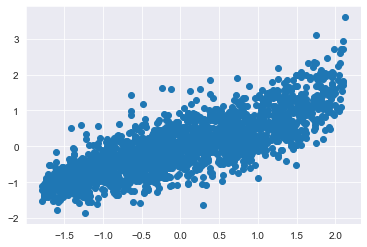

In [80]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

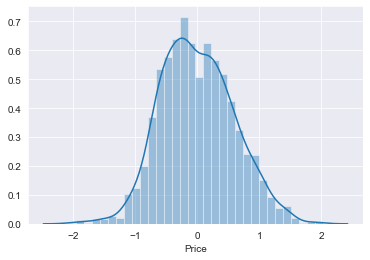

In [81]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))